## Algorytm roju cząstek (PSO - particle swarm optimization)

Inspirowany jest procesami zachodzącymi w stadach ryb bądź ptaków. Podobnie jak stado ptaków, rój podąża za przywódcą, bieżącym, najlepszym znanym rozwiązaniem, przyspieszając i zmieniając kierunek, gdy lepsze rozwiązanie zostanie znalezione. W naturze można te zachowania odnieść np. do poszukiwania jedzenia.


Zaproponowany w 1995 roku przez R.C.Eberharta (elektrotechnika) i J. Kennediego (psychologa społecznego) i pierwotnie skonstruowany do prowadzenia symulacji zachowań społecznych. W praktyce PSO i jego modyfikacje mają wiele cech wspólnych z algorytmami genetycznymi, jednak nie korzysta się w nich z operatorów genetycznych, takich jak krzyżowanie czy mutacja.

Populacja możliwych rozwiązań traktowana jest jako rój, a każdy jej element (możliwe rozwiązanie problemu) jest cząstką. Kolejne kroki algorytmu sprawiają, że cząstki przemieszczają się, symulując adaptację roju do środowiska, czyli poszukują optimum. W roju występuje lider, czyli cząstka o najlepszym położeniu. Każda cząstka ma też przypisanych sąsiadów, którzy podążają razem z nią. Każda cząstka jest więc w ruchu pod wpływem lokalnej, najlepszej pozycji lidera i kieruje się również w jego stronę. Takie zachowanie powoduje przemieszczanie cząstek w kierunku najlepszych rozwiązań. Dużą zaletą jest pamiętanie stanu poprzedniego, co pozwala na eksplorację znanej okolicy, a jednoczenie nie hamuje eksplorowania przestrzeni dalszych.

![pso_gif.gif](https://www.scottcondron.com/images/copied_from_nb/my_icons/pso_gif.gif "Source: Wikipedia")

Podstawowy algorytm PSO można sformułować w następujący sposób:
1. Losowe tworzenie próby początkowej (zbioru punktów reprezentujących cząstki) – dla każdej cząstki określone zostają położenie i prędkość początkowa.
2. Obliczenie funkcji przystosowania dla próby.
3. Wybór najlepszego rozwiązania – określenie najlepszego sąsiada oraz wytypowanie lidera roju.
4. Sprawdzenie kryterium stopu.
5. Tworzenie kolejnej próby według zdefiniowanej reguły – nowy wektor prędkości obliczany jest na podstawie parametrów cząstki, jej najlepszego sąsiada oraz lidera roju, a nowe położenie cząstki określane jest na podstawie jej parametrów (położenia oraz nowego wektora prędkości).
6. Iteracja od punktu 2.

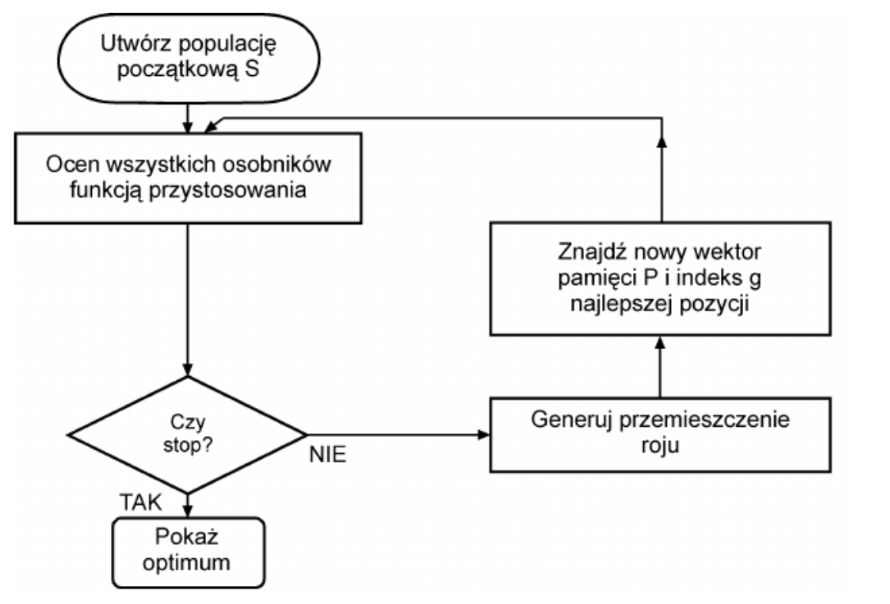

Omówmy przypadek zastosowania PSO do optymalizacji **funkcji kulistej (sphere function)** - jest ona standardową funkcją używaną jako problem testowy wydajności dla algorytmów optymalizacyjnych.

$f(x_1 \cdots x_n) = \sum_{i=1}^n x_i^2$

$\text{minimum w }f(0, \cdots, 0) = 0$

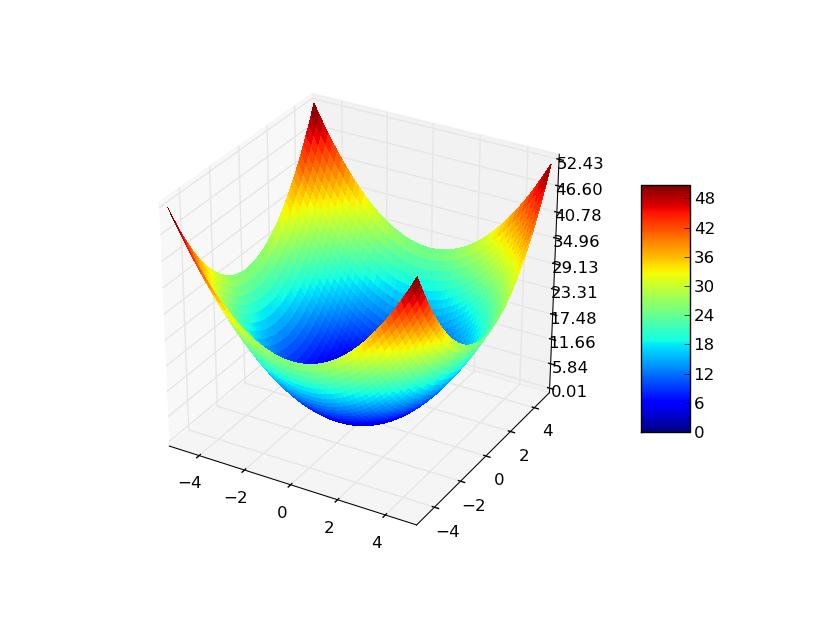

### Kilka słów o parametrach:

w - współczynnik inercji (inertia weight) - decyduje o stopniu swobody ruchu cząstek w przestrzeni zmiennych.

c1 - tzw. the cognitive scaling constant

c2 - tzw. the social scaling constant

Stałe c1 i c2 to parametry skalujące, również określane jako parametry zaufania, gdzie c1 wyraża zaufanie, jakie cząstka ma do siebie, podczas gdy c2 wyraża zaufanie, jakie cząstka ma do swoich sąsiadów.

Przy c1 = c2 = 0 cząstki lecą z obecną prędkością, dopóki nie uderzą w granicę przestrzeni poszukiwań (zakładając brak bezwładności). Jeśli c1 > 0 i c2 = 0, wszystkie cząstki są niezależne. Każda cząstka znajduje najlepszą pozycję w swoim sąsiedztwie, zastępując obecną najlepszą pozycję, jeśli nowa pozycja jest lepsza.
Jeśli c2 > 0 i c1 = 0, cały rój jest przyciągany do jednego punktu.



In [ ]:
import numpy as np
# zdefiniowanie funkcji przystosowania
def sphere(x):
    return np.sum(np.square(x))


# stwórzmy tablice do wyrysowania później przebiegu algorytmu
avgs = []
bests_fitness = []

# zdefiniowanie algorytmu roju cząstek
def pso(cost_func, dim=2, num_particles=30, max_iter=30, w=0.5, c1=1, c2=2):

    # zainicjowanie cząstek i ich prędkości
    particles = np.random.uniform(-5.12, 5.12, (num_particles, dim))
    velocities = np.zeros((num_particles, dim))

    # inicjalizacja najlepszych pozycji cząstek oraz funkcji przystosowania (fitness function)
    best_positions = np.copy(particles)
    best_fitness = np.array([cost_func(p) for p in particles])
    swarm_best_position = best_positions[np.argmin(best_fitness)]
    swarm_best_fitness = np.min(best_fitness)

    # iterujemy sie przez podana w funkcji ilosc iteracji, aktualizujac prednosci i pozycji każdej z cząstek
    for i in range(max_iter):
        # aktualizacja wartości prędkości cząstek
        r1 = np.random.uniform(0, 1, (num_particles, dim))
        r2 = np.random.uniform(0, 1, (num_particles, dim))
        velocities = w * velocities + c1 * r1 * (best_positions - particles) + c2 * r2 * (swarm_best_position - particles)

        # aktualizacja pozycji cząstek
        particles += velocities

        # ewaluacja funkcji przystosowania dla każdej z cząstek
        fitness_values = np.array([cost_func(p) for p in particles])

        # zapisujemy średnią wartość funkcji przystosowania w roju
        avgs.append(np.mean(fitness_values))
        # aktualizacja najlepszych pozycji i funkcji przystosowania
        improved_indices = np.where(fitness_values < best_fitness)
        best_positions[improved_indices] = particles[improved_indices]
        best_fitness[improved_indices] = fitness_values[improved_indices]
        if np.min(fitness_values) < swarm_best_fitness:
            swarm_best_position = particles[np.argmin(fitness_values)]
            swarm_best_fitness = np.min(fitness_values)

        # zapisujemy najlepszą wartość funkcji przystosowania
        bests_fitness.append(swarm_best_fitness)
        print('Epoch:',i)
        print('Swarm best position:',swarm_best_position)
        print('Swarm best fitness:', swarm_best_fitness)
    # zwrócenie najlepszego wyniku znalezionego przez algorytm
    return swarm_best_position, swarm_best_fitness

# uruchomienie algorytmu PSO dla wybranej funkcji
solution, fitness = pso(sphere)
print('---')
# wydrukowanie wyników
print('Rozwiązanie:', solution)
print('Wartość funkcji przystosowania:', fitness)

Epoch: 0
Swarm best position: [0.41307112 0.30938058]
Swarm best fitness: 0.2663440908566346
Epoch: 1
Swarm best position: [0.24369402 0.15149963]
Swarm best fitness: 0.08233891287263849
Epoch: 2
Swarm best position: [ 0.01622486 -0.02182313]
Swarm best fitness: 0.0007394952714980443
Epoch: 3
Swarm best position: [ 0.14686109 -1.23122809]
Swarm best fitness: 0.0007394952714980443
Epoch: 4
Swarm best position: [ 0.08430944 -1.29097913]
Swarm best fitness: 0.0007394952714980443
Epoch: 5
Swarm best position: [ 0.01855695 -0.38898426]
Swarm best fitness: 0.0007394952714980443
Epoch: 6
Swarm best position: [ 0.00961489 -0.00720709]
Swarm best fitness: 0.00014438829356807367
Epoch: 7
Swarm best position: [-0.03122169  0.66316451]
Swarm best fitness: 0.00014438829356807367
Epoch: 8
Swarm best position: [-0.02429354  0.66030713]
Swarm best fitness: 0.00014438829356807367
Epoch: 9
Swarm best position: [0.00392779 0.27813734]
Swarm best fitness: 0.00014438829356807367
Epoch: 10
Swarm best positi

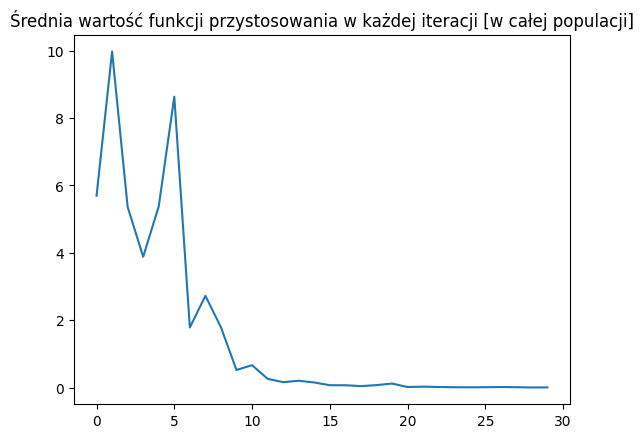

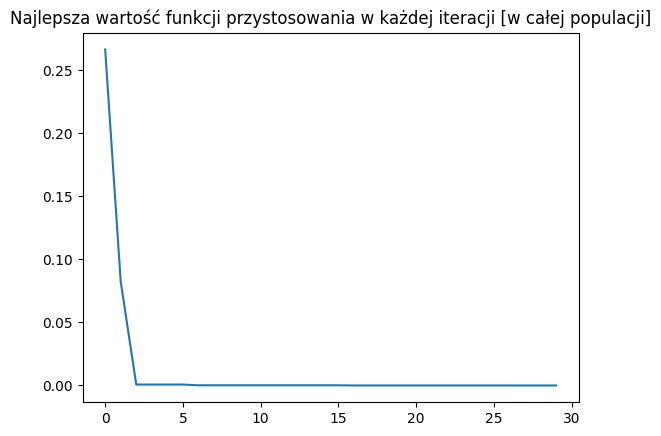

In [ ]:
import matplotlib.pyplot as plt
plt.plot(avgs)
plt.title("Średnia wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
plt.show()
print('    ')
plt.plot(bests_fitness)
plt.title("Najlepsza wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
plt.show()

## Zadania do samodzielnego wykonania

1.

Proszę, korzystając z algorytmu roju cząstek znaleźć minimum funkcji

$f(x,y)= 𝑥^{2} + 𝑦^{2} − 20(cos 𝜋𝑥 + cos 𝜋𝑦 − 2)$ w przedziale 𝑥, 𝑦 ∈ [−10,10],  


przy założeniu że rozwiązanie jest reprezentowane przez wektor [𝑥𝑖, 𝑦𝑖].

Proszę zbadać:
- funkcjonowanie algorytmu dla c1=0, c2=2
- funkcjonowanie algorytmu dla c1=2, c2=0 oraz kilku przypadków pośrednich.
- funkcjonowanie algorytmu dla c1 = c2 = 2,2
- funkcjonowanie dla różnych wartości w.


Za każdym razem należy podać średnie wyniki (wartość funkcji przystosowania) oraz odchylenie standardowe dla 10 wywołań algorytmu i przedstawić przykładowe przebiegi algorytmu na wykresach (dla jednego z wywołań).

Należy opisać, który wariant sprawdzał się najlepiej.

2.

Uzyskany najlepszy wynik proszę w miarę możliwości porównać z algorytmem genetycznym – dedykowanym dla optymalizacji tej samej funkcji. Zakładamy użycie takiej samej liczby epok dla obu algorytmów.
Należy porównać czas działania obydwu algorytmów.

## Zadania dla chętnych

3*.

Proszę obejrzeć jak działa algorytm w trybie animacji dla obydwu wspomnianych w notatniku funkcji.


http://www.alife.pl/files/opt/d/OptiVisJS/OptiVisJS.html?lang=pl
